In [156]:
import tensorflow as tf
import os

In [157]:
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)
gpus
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [158]:
import cv2
import imghdr

In [159]:
data_dir = 'data'
os.listdir(data_dir)

['happy', 'sad']

In [160]:
image_exts = ['jpeg','jpg','bmp','png']
image_exts[2]

'bmp'

In [161]:
for image_class in os.listdir(data_dir): 
    print(image_class)

happy
sad


In [162]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [163]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [164]:
import numpy as np
from matplotlib import pyplot as plt

In [165]:
data = tf.keras.utils.image_dataset_from_directory('data')
data

Found 136 files belonging to 2 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [166]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [167]:
batch = data_iterator.next()
batch

(array([[[[3.62994995e+01, 3.62994995e+01, 3.62994995e+01],
          [3.15704346e+01, 3.15704346e+01, 3.15704346e+01],
          [2.87641602e+01, 2.87641602e+01, 2.87641602e+01],
          ...,
          [1.46868958e+02, 1.46868958e+02, 1.46868958e+02],
          [1.48138062e+02, 1.48138062e+02, 1.48138062e+02],
          [1.49546875e+02, 1.49546875e+02, 1.49546875e+02]],
 
         [[2.81848145e+01, 2.81848145e+01, 2.81848145e+01],
          [2.12183838e+01, 2.12183838e+01, 2.12183838e+01],
          [1.97315674e+01, 1.97315674e+01, 1.97315674e+01],
          ...,
          [1.49599060e+02, 1.49599060e+02, 1.49599060e+02],
          [1.48382874e+02, 1.48382874e+02, 1.48382874e+02],
          [1.47200562e+02, 1.47200562e+02, 1.47200562e+02]],
 
         [[2.27737427e+01, 2.27737427e+01, 2.27737427e+01],
          [2.09252930e+01, 2.09252930e+01, 2.09252930e+01],
          [1.94171753e+01, 1.94171753e+01, 1.94171753e+01],
          ...,
          [1.49062500e+02, 1.49062500e+02, 1.4906

In [168]:
len(batch)
batch[0].shape

(32, 256, 256, 3)

In [169]:
batch[1]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

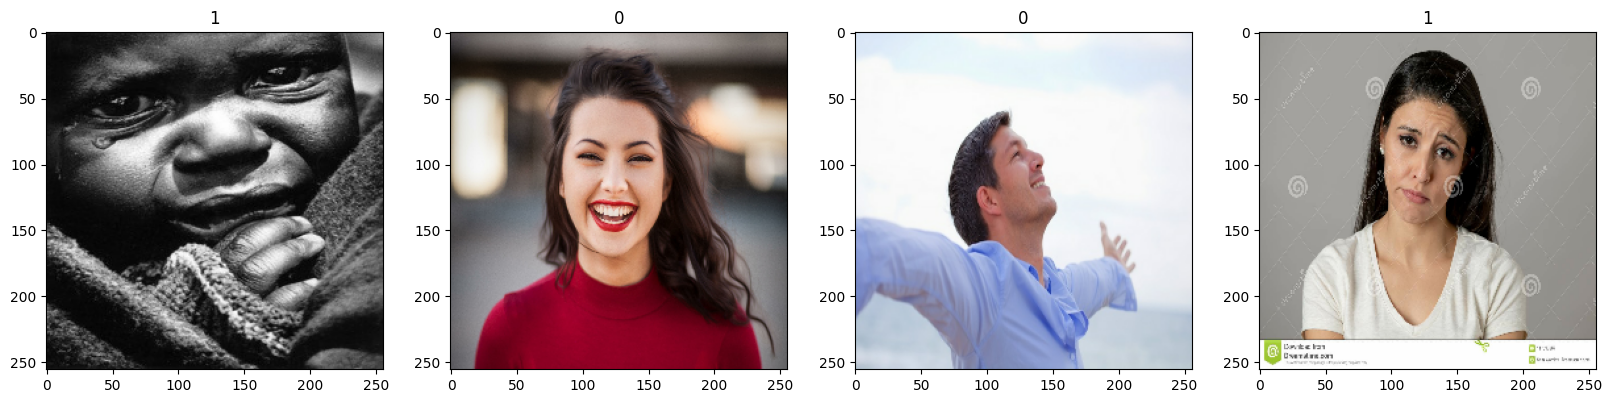

In [170]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [171]:
scaled = batch[0] / 255
scaled.min()
scaled.max()

1.0

In [172]:
data = data.map(lambda x,y: (x/255,y))

In [173]:
scaled_iterator = data.as_numpy_iterator()

In [174]:
scaled_iterator.next()[0]

array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [3.32124606e-02, 3.32124606e-02, 3.32124606e-02],
         [1.39368877e-01, 1.39368877e-01, 1.39368877e-01],
         ...,
         [9.42885410e-03, 9.42885410e-03, 9.42885410e-03],
         [3.55698541e-02, 3.55698541e-02, 3.55698541e-02],
         [3.55590805e-02, 3.55590805e-02, 3.55590805e-02]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [5.77000044e-02, 5.77000044e-02, 5.77000044e-02],
         [1.24654613e-01, 1.24654613e-01, 1.24654613e-01],
         ...,
         [4.08313237e-03, 4.08313237e-03, 4.08313237e-03],
         [2.43566185e-02, 2.43566185e-02, 2.43566185e-02],
         [3.52941193e-02, 3.52941193e-02, 3.52941193e-02]],

        [[1.53186280e-04, 1.53186280e-04, 1.53186280e-04],
         [7.79189169e-02, 7.79189169e-02, 7.79189169e-02],
         [7.77879879e-02, 7.77879879e-02, 7.77879879e-02],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [

In [175]:
batch = scaled_iterator.next()

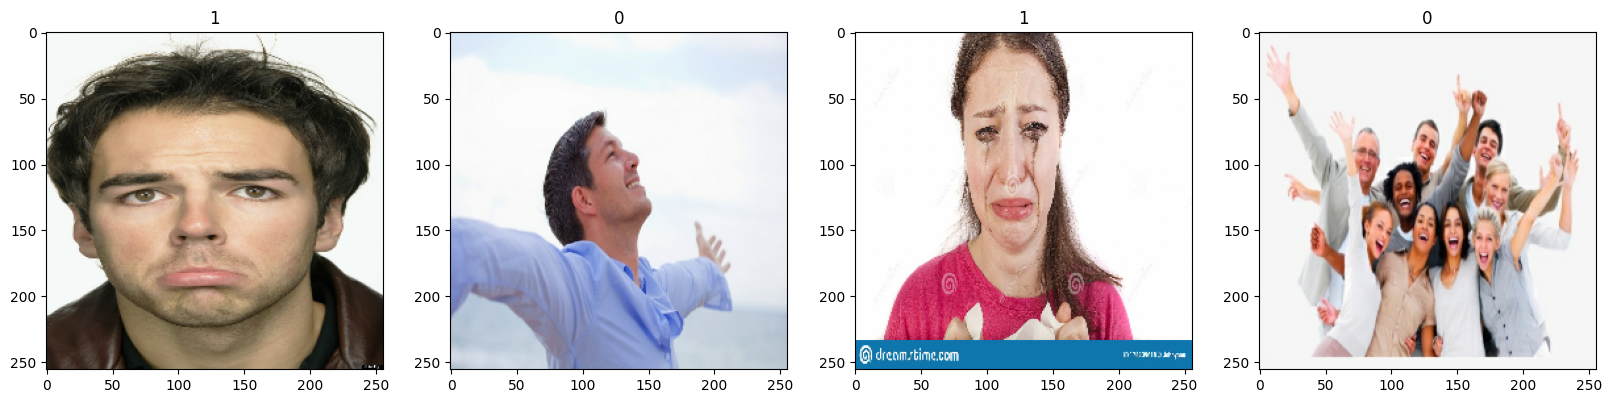

In [176]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [177]:
len(data)

5

In [178]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [179]:
train_size+ val_size+ test_size

5

In [180]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [181]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [182]:
model = Sequential()

In [183]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [184]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [185]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [186]:
logdir='logs'

In [187]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [188]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
3/3 [==============================] - 7s 2s/step - loss: 0.7648 - accuracy: 0.6354 - val_loss: 0.5401 - val_accuracy: 0.8438
Epoch 2/20
3/3 [==============================] - 5s 1s/step - loss: 0.6260 - accuracy: 0.6875 - val_loss: 0.5789 - val_accuracy: 0.6875
Epoch 3/20
3/3 [==============================] - 5s 1s/step - loss: 0.5735 - accuracy: 0.7188 - val_loss: 0.4853 - val_accuracy: 0.7500
Epoch 4/20
3/3 [==============================] - 5s 1s/step - loss: 0.5610 - accuracy: 0.7083 - val_loss: 0.5897 - val_accuracy: 0.6562
Epoch 5/20
3/3 [==============================] - 5s 1s/step - loss: 0.5430 - accuracy: 0.7083 - val_loss: 0.5226 - val_accuracy: 0.6875
Epoch 6/20
3/3 [==============================] - 5s 1s/step - loss: 0.5149 - accuracy: 0.7292 - val_loss: 0.4627 - val_accuracy: 0.7812
Epoch 7/20
3/3 [==============================] - 5s 1s/step - loss: 0.4910 - accuracy: 0.7188 - val_loss: 0.5245 - val_accuracy: 0.6875
Epoch 8/20
3/3 [=========================

In [189]:
hist.history

{'loss': [0.76484614610672,
  0.6260325312614441,
  0.5735010504722595,
  0.5609624981880188,
  0.5430482029914856,
  0.5148668885231018,
  0.4909890592098236,
  0.43360814452171326,
  0.4294482171535492,
  0.40583017468452454,
  0.3118039071559906,
  0.296360045671463,
  0.256856232881546,
  0.30023011565208435,
  0.24052469432353973,
  0.21701686084270477,
  0.1951642483472824,
  0.18230648338794708,
  0.18833136558532715,
  0.09543794393539429],
 'accuracy': [0.6354166865348816,
  0.6875,
  0.71875,
  0.7083333134651184,
  0.7083333134651184,
  0.7291666865348816,
  0.71875,
  0.7604166865348816,
  0.7604166865348816,
  0.8020833134651184,
  0.875,
  0.8645833134651184,
  0.8645833134651184,
  0.84375,
  0.8854166865348816,
  0.90625,
  0.9479166865348816,
  0.9166666865348816,
  0.9270833134651184,
  0.9791666865348816],
 'val_loss': [0.5401409864425659,
  0.5789137482643127,
  0.485309898853302,
  0.5896560549736023,
  0.5226417779922485,
  0.4627469778060913,
  0.5245085954666138

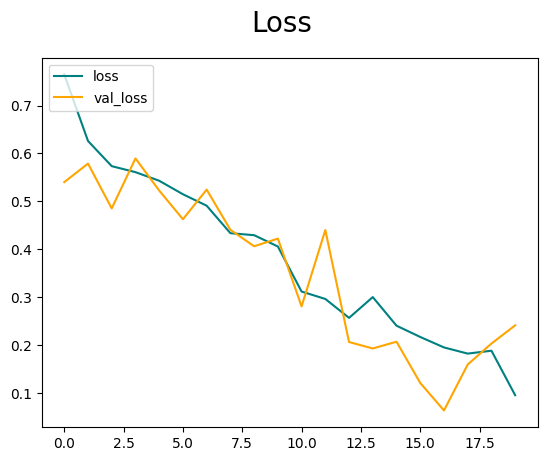

In [190]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

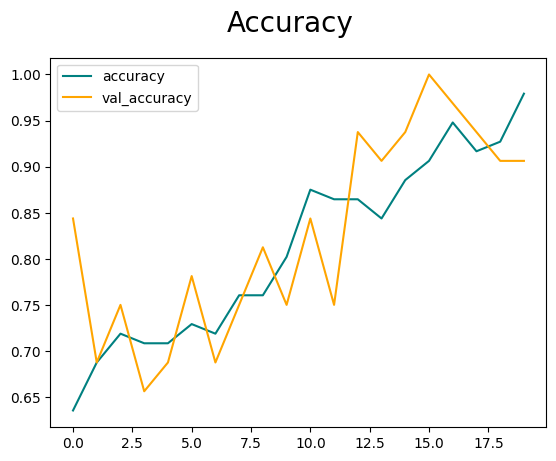

In [191]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [192]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [193]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [194]:
len(test)

1

In [195]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 124ms/step


In [196]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


In [197]:
import cv2

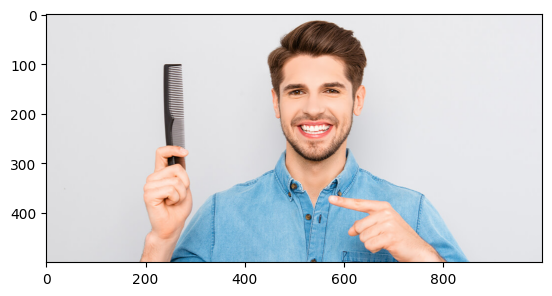

In [206]:
img = cv2.imread('sad2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

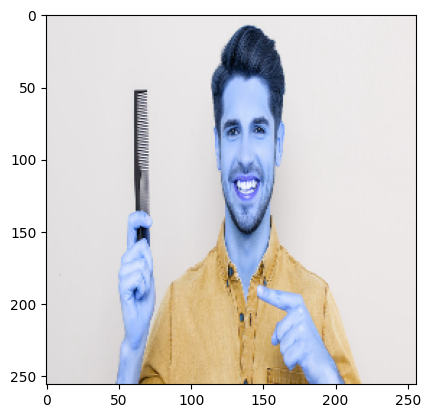

In [207]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [200]:
np.expand_dims(resize, 0)

array([[[[134.15625, 145.15625, 129.15625],
         [138.46875, 149.46875, 133.46875],
         [141.78125, 152.     , 138.34375],
         ...,
         [244.21875, 245.21875, 249.21875],
         [245.     , 246.     , 250.     ],
         [245.     , 246.     , 250.     ]],

        [[134.15625, 145.15625, 129.15625],
         [138.46875, 149.46875, 133.46875],
         [141.78125, 152.     , 138.34375],
         ...,
         [244.     , 245.     , 249.     ],
         [244.     , 245.     , 249.     ],
         [244.     , 245.     , 249.     ]],

        [[134.15625, 145.15625, 129.15625],
         [138.46875, 149.46875, 133.46875],
         [141.78125, 152.     , 138.34375],
         ...,
         [243.78125, 244.78125, 248.78125],
         [243.     , 244.     , 248.     ],
         [243.     , 244.     , 248.     ]],

        ...,

        [[157.38062, 172.41577, 211.41577],
         [157.95068, 172.98584, 211.98584],
         [136.10883, 151.11652, 190.11652],
         ...,


In [201]:
resize.shape

TensorShape([256, 256, 3])

In [208]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 34ms/step


In [209]:
yhat

array([[0.05004018]], dtype=float32)

In [210]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [205]:
from tensorflow.keras.models import load_model